In [184]:
import pandas as pd

In [185]:
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sb
import random as rd
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import ttest_ind
from scipy.special import comb
from scipy import stats

In [186]:
sns.set()

In [187]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep=';')

In [188]:
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
id_client     10976 non-null int64
id_group      10902 non-null object
sum_pay       10849 non-null float64
id_point      10895 non-null float64
months_reg    10976 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [190]:
df1 = df.dropna()

In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10975
Data columns (total 5 columns):
id_client     10840 non-null int64
id_group      10840 non-null object
sum_pay       10840 non-null float64
id_point      10840 non-null float64
months_reg    10840 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 508.1+ KB


In [192]:
r =df1['sum_pay'].tolist()
r

[3288.0,
 1267.0,
 4259.0,
 7211.0,
 760.0,
 218.0,
 1295.0,
 4008.0,
 4708.0,
 4109.0,
 3975.0,
 297.0,
 701.0,
 3601.0,
 454.0,
 1752.0,
 4024.0,
 5878.0,
 893.0,
 7615.0,
 585.0,
 733.0,
 3737.0,
 399.0,
 750.0,
 3279.0,
 5569.0,
 3970.0,
 1660.0,
 4561.0,
 3360.0,
 4609.0,
 1506.0,
 274.0,
 1781.0,
 4729.0,
 3589.0,
 5188.0,
 2399.0,
 7697.0,
 4650.0,
 5810.0,
 3005.0,
 1650.0,
 438.0,
 2345.0,
 1082.0,
 3947.0,
 3903.0,
 3592.0,
 114.0,
 8041.0,
 3001.0,
 6573.0,
 1023.0,
 4441.0,
 7093.0,
 7305.0,
 4343.0,
 6508.0,
 6485.0,
 3559.0,
 603.0,
 6952.0,
 2182.0,
 1227.0,
 4398.0,
 4359.0,
 1637.0,
 2711.0,
 651.0,
 4124.0,
 6977.0,
 2162.0,
 1625.0,
 3956.0,
 6437.0,
 6866.0,
 1486.0,
 1571.0,
 2622.0,
 5078.0,
 3804.0,
 3292.0,
 2155.0,
 4925.0,
 446.0,
 4712.0,
 4108.0,
 226.0,
 2744.0,
 5758.0,
 1465.0,
 983.0,
 5015.0,
 1304.0,
 1602.0,
 771.0,
 961.0,
 1077.0,
 5812.0,
 2299.0,
 311.0,
 217.0,
 7633.0,
 9133.0,
 237.0,
 4043.0,
 1001.0,
 4430.0,
 5023.0,
 7812.0,
 3730.0,
 6487.

In [193]:
q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9,0.95,0.97,0.99,1]
def statistical_analysis(list_r,quan):
        list_qs=pd.Series(list_r)
        m=list_qs.mean()
        v=list_qs.var()
        s=list_qs.std()
        print("Среднее = ",m)
        print("Дисперсия = ",v)
        print("Стандартное отклонение = ",s)
        qs=np.quantile(list_r,q)
        for i in range(len(q)):
            if q[i]==0.5:
                print("Медиана= ",qs[i])
            elif q[i]==0.25:
                print("Первый квартиль = ",qs[i])
            elif q[i]==0.50:
                print("Второй квартиль = ",qs[i])
            elif q[i]==0.75:
                print("Третий квартиль = ",qs[i])
            elif q[i]==0.10:
                print("Первый дециль = ",qs[i])
            elif q[i]==0.20:
                print("Второй дециль = ",qs[i])
            elif q[i]==0.30:
                print("Третий дециль = ",qs[i])
            elif q[i]==0.40:
                print("Четвертый дециль = ",qs[i])
            elif q[i]==0.50:
                print("Пятый дециль = ",qs[i])
            elif q[i]==0.60:
                print("Шестой дециль = ",qs[i])
            elif q[i]==0.70:
                print("Седьмой дециль = ",qs[i])
            elif q[i]==0.80:
                print("Восьмой дециль = ",qs[i])
            elif q[i]==0.90:
                print("Девятый дециль = ",qs[i])
            elif q[i]==0.95:
                print("95 = ",qs[i])
            elif q[i]==0.97:
                print("97 = ",qs[i])
            elif q[i]==0.99:
                print("99 = ",qs[i])
            elif q[i]==1:
                print("100 = ",qs[i])
    #r = pd.Series(r)
    #sns.histplot(data = r)       
        return "Среднее ={0}".format(m) ,"Дисперсия ={0}".format(v) ,"Стандартное отклонение ={0}".format(s),qs

statistical_analysis(r,q)

Среднее =  3568.7580258302582
Дисперсия =  8568932.941996625
Стандартное отклонение =  2927.27397795229
Первый дециль =  410.0
Первый квартиль =  1250.75
Третий дециль =  1590.0
Четвертый дециль =  2329.6000000000004
Медиана=  3173.5
Шестой дециль =  3934.0
Третий квартиль =  5356.5
Девятый дециль =  7088.200000000001
95 =  7805.0999999999985
97 =  8453.64
99 =  9809.76000000001
100 =  24797.0


('Среднее =3568.7580258302582',
 'Дисперсия =8568932.941996625',
 'Стандартное отклонение =2927.27397795229',
 array([  410.  ,  1250.75,  1590.  ,  2329.6 ,  3173.5 ,  3934.  ,
         5356.5 ,  7088.2 ,  7805.1 ,  8453.64,  9809.76, 24797.  ]))

In [194]:
df1.loc[df1['sum_pay'].nlargest(10).index]

,id_client,id_group,sum_pay,id_point,months_reg
7697,1370478,test,24797.0,1179.0,4
8977,1371536,control,24784.0,1179.0,3
5077,1390929,test,24761.0,1182.0,10
9617,1370589,test,24645.0,1179.0,10
634,1389914,test,24618.0,1182.0,8
3971,1372071,control,24595.0,1179.0,1
4326,1371622,control,24595.0,1179.0,7
10799,1373154,test,24412.0,1179.0,5
7434,1390634,test,24297.0,1182.0,10
8572,1389745,test,24261.0,1182.0,8


In [195]:
df1.groupby('id_group')['id_client'].count()

id_group
control    5171
test       5669
Name: id_client, dtype: int64

In [196]:
df1.groupby('id_point')['id_client'].count()

id_point
1178.0    4810
1179.0    3471
1182.0    2010
1186.0      63
1188.0      10
1199.0     476
Name: id_client, dtype: int64

In [197]:
# Уберем выбросы по клиентам на точках, которые могут влиять на результат

In [198]:
df2=df1.loc[df1['sum_pay']<=12000]
df2

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [199]:
df2.groupby('id_point')['id_client'].count()

id_point
1178.0    4809
1179.0    3442
1182.0    1962
1186.0      63
1188.0       9
1199.0     476
Name: id_client, dtype: int64

In [200]:
df2.groupby('id_group')['id_client'].count()

id_group
control    5140
test       5621
Name: id_client, dtype: int64

In [201]:
df_test = df2.loc[df2['id_group'] =='test' ]
df_test

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
3,1370042,test,7211.0,1179.0,3
5,1371160,test,218.0,1179.0,5
6,1372110,test,1295.0,1179.0,1
8,1372555,test,4708.0,1179.0,9
...,...,...,...,...,...
10967,1359429,test,3371.0,1178.0,3
10968,1359869,test,6590.0,1178.0,5
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [202]:
df_control = df2.loc[df2['id_group'] =='control' ]
df_control

,id_client,id_group,sum_pay,id_point,months_reg
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
4,1360376,control,760.0,1178.0,14
7,1373231,control,4008.0,1179.0,0
9,1373288,control,4109.0,1179.0,8
...,...,...,...,...,...
10966,1391333,control,2704.0,1182.0,5
10969,1389984,control,1818.0,1182.0,2
10970,1362847,control,2055.0,1178.0,4
10971,1359021,control,799.0,1178.0,3


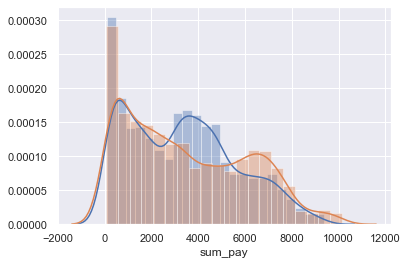

In [204]:
sns.distplot(df_control['sum_pay']) #голубая
sns.distplot(df_test['sum_pay'])
plt.show()

In [205]:
alpha=0.05

def test_calc(r1,r2,a):
    s,p = ttest_ind(r1,r2)
    print('s =', s)
    print('p =', p)
    if p==a:
        print ('Принимается Но')
    else:
        print('Не принимается Но')

test_calc(df_control['sum_pay'],df_test['sum_pay'],alpha)

s = -3.7141912292177888
p = 0.0002048855494553075
Не принимается Но


In [ ]:
# Гипотеза Но отвергается, это говорит о том, что большее начисление балов лояльности эффективно, и гипотеза Н1 принимается.

In [206]:
def mann_whitney_func(r1, r2, alpha):
    s,p=stats.mannwhitneyu(x=r1, y=r2, alternative = 'two-sided')
    print('s =', s)
    print('p =', p) 
    if p==alpha:
        print('Распределения равны')
    elif p!=alpha:
        print('Распределения не равны')
        
mann_whitney_func(df_control['sum_pay'],df_test['sum_pay'], alpha)

s = 14141330.5
p = 0.058421258797022896
Распределения не равны


In [ ]:
# Гипотезу Но принимаем,повышение балов лояльности не эффективно, т.к. p-value больше альфы.

In [ ]:
# Вывод: Однозначного ответа о лучших условиях организации акции мы не получили. Необходимо детальнее разобраться в данных.

In [262]:
for i in df2['id_point'].unique():
    r1=df_control.loc[df_control['id_point'] ==i]
    r1=r1['sum_pay']
    r2=df_test.loc[df_test['id_point'] ==i]
    r2=r2['sum_pay']
    mann_whitney_func(r1, r2, alpha)
    print(i)
    print()

s = 0.0
p = 0.0
Распределения не равны
1199.0

s = 382818.5
p = 5.946812205351181e-15
Распределения не равны
1182.0

s = 3122337.5
p = 1.5133330174771163e-06
Распределения не равны
1178.0

s = 1447666.5
p = 0.2580763851815786
Распределения не равны
1179.0

s = 553.0
p = 0.18665794088873022
Распределения не равны
1186.0

s = 12.0
p = 0.7133031738784577
Распределения не равны
1188.0



In [ ]:
# В разбивке по точкам формула Манн Витни говорит, что гипотезу Но принимаем.

s = nan
p = nan
Не принимается Но
1199.0

s = -7.172588995409098
p = 1.0387447468996453e-12
Не принимается Но
1182.0

s = 1.5338932633911708
p = 0.1251217226713009
Не принимается Но
1178.0

s = -1.1225576641441302
p = 0.2617037465196552
Не принимается Но
1179.0

s = 1.3502123367588006
p = 0.181936501831722
Не принимается Но
1186.0

s = 0.13596158621984006
p = 0.8956790614998074
Не принимается Но
1188.0



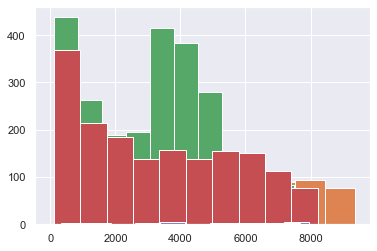

In [263]:
for i in df2['id_point'].unique():
        r1=df_control.loc[df_control['id_point'] ==i]
        r1=r1['sum_pay']
        plt.hist(r1)
        r2=df_test.loc[df_test['id_point'] ==i]
        r2=r2['sum_pay']
        test_calc(r1,r2,alpha)
        print(i) 
        print()

In [ ]:
# И Т-критерий Стьюдента тоже подтверждает, что гипотеза Но верна.

C:\Users\tavlintseva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\tavlintseva\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\tavlintseva\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


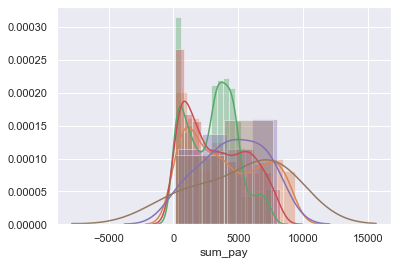

In [209]:
for i in df2['id_point'].unique():
    sns.distplot(df_control['sum_pay'].loc[df_control['id_point']==i]) #голубая
#1182 - голубая
#1178 - оранжевая
#1179 - зеленая
plt.show()

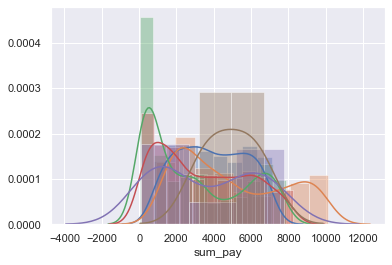

In [210]:
for i in df2['id_point'].unique():
    sns.distplot(df_test['sum_pay'].loc[df_test['id_point']==i])
#1182 - голубая
#1178 - оранжевая
#1179 - зеленая
plt.show()

In [ ]:
# На графике видно, что акция побудила людей делать покупки не привышающие 1000 рублей.

In [230]:
df_control82=df_control.loc[df_control['id_point']==1182]
df_control78=df_control.loc[df_control['id_point']==1178]
df_control79=df_control.loc[df_control['id_point']==1179]
df_control86=df_control.loc[df_control['id_point']==1186]
df_control88=df_control.loc[df_control['id_point']==1188]
df_control99=df_control.loc[df_control['id_point']==1199]
df_test82=df_test.loc[df_test['id_point']==1182]
df_test78=df_test.loc[df_test['id_point']==1178]
df_test79=df_test.loc[df_test['id_point']==1179]
df_test86=df_test.loc[df_test['id_point']==1186]
df_test88=df_test.loc[df_test['id_point']==1188]
df_test99=df_test.loc[df_test['id_point']==1199]

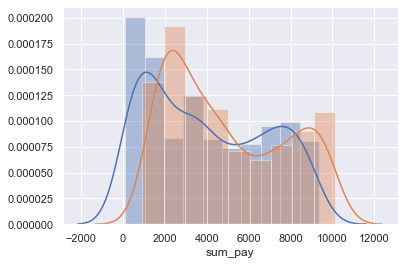

In [212]:
# По точке 1182 в контрорльной группе покупки до 1000р приобладают, а в тестовой покупки в районе 2х-3х тысяч, и в среднем цена 
# покупки на 900р больше. И общая сумма покупки с тестовой больше на 600 000 р.
sns.distplot(df_control82['sum_pay']) #голубая
sns.distplot(df_test82['sum_pay'])
plt.show()

In [213]:
df_control82.describe( )

,id_client,sum_pay,id_point,months_reg
count,1.012000e+03,1012.000000,1012.0,1012.000000
mean,1.390729e+06,4036.942688,1182.0,5.166996
std,5.923671e+02,2829.095227,0.0,3.319871
min,1.389681e+06,104.000000,1182.0,0.000000
25%,1.390222e+06,1465.500000,1182.0,3.000000
50%,1.390734e+06,3565.500000,1182.0,5.000000
75%,1.391243e+06,6616.250000,1182.0,7.000000
max,1.391731e+06,9362.000000,1182.0,14.000000


In [214]:
df_control82['sum_pay'].sum()

4085386.0

In [215]:
df_test82.describe( )

,id_client,sum_pay,id_point,months_reg
count,9.500000e+02,950.000000,950.0,950.000000
mean,1.390674e+06,4945.129474,1182.0,5.760000
std,5.919505e+02,2774.643066,0.0,3.066402
min,1.389680e+06,923.000000,1182.0,0.000000
25%,1.390152e+06,2459.250000,1182.0,3.000000
50%,1.390678e+06,4267.500000,1182.0,5.000000
75%,1.391187e+06,7545.750000,1182.0,8.000000
max,1.391732e+06,10141.000000,1182.0,14.000000


In [216]:
df_test82['sum_pay'].sum()

4697873.0

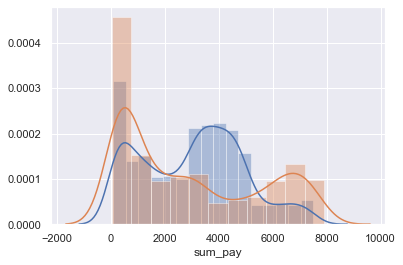

In [217]:
# По точке 1178 преобладают покупки до 1000р в тестовой группе, когда в контрольной в районе 4000р. Общая сумма покупок больше 
# в контрольной группе.
sns.distplot(df_control78['sum_pay']) #голубая
sns.distplot(df_test78['sum_pay'])
plt.show()

In [218]:
df_control78.describe( )

,id_client,sum_pay,id_point,months_reg
count,2.403000e+03,2403.000000,2403.0,2403.000000
mean,1.361395e+06,3036.214732,1178.0,4.407407
std,1.395120e+03,1895.463389,0.0,2.935623
min,1.359001e+06,101.000000,1178.0,0.000000
25%,1.360224e+06,1284.500000,1178.0,2.000000
50%,1.361377e+06,3234.000000,1178.0,4.000000
75%,1.362602e+06,4385.000000,1178.0,6.000000
max,1.363809e+06,7499.000000,1178.0,14.000000


In [219]:
df_control78['sum_pay'].sum()

7296024.0

In [220]:
df_test78.describe( )

,id_client,sum_pay,id_point,months_reg
count,2.406000e+03,2406.000000,2406.0,2406.000000
mean,1.361415e+06,2936.386949,1178.0,4.330424
std,1.382444e+03,2567.058379,0.0,3.352990
min,1.359000e+06,59.000000,1178.0,0.000000
25%,1.360190e+06,543.250000,1178.0,2.000000
50%,1.361454e+06,2178.500000,1178.0,3.000000
75%,1.362610e+06,5477.250000,1178.0,6.000000
max,1.363807e+06,7897.000000,1178.0,14.000000


In [221]:
df_test78['sum_pay'].sum()

7064947.0

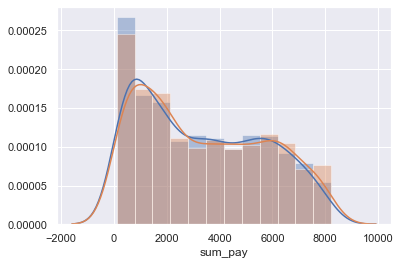

In [222]:
# По точке 1179 практически не заметна разница между группами. Сумма покупок в тестовой группе больше контрольной на 300 000р.
sns.distplot(df_control79['sum_pay']) #голубая
sns.distplot(df_test79['sum_pay'])
plt.show()

In [223]:
df_control78.describe( )

,id_client,sum_pay,id_point,months_reg
count,2.403000e+03,2403.000000,2403.0,2403.000000
mean,1.361395e+06,3036.214732,1178.0,4.407407
std,1.395120e+03,1895.463389,0.0,2.935623
min,1.359001e+06,101.000000,1178.0,0.000000
25%,1.360224e+06,1284.500000,1178.0,2.000000
50%,1.361377e+06,3234.000000,1178.0,4.000000
75%,1.362602e+06,4385.000000,1178.0,6.000000
max,1.363809e+06,7499.000000,1178.0,14.000000


In [224]:
df_control79['sum_pay'].sum()

5653234.0

In [225]:
df_test78.describe( )

,id_client,sum_pay,id_point,months_reg
count,2.406000e+03,2406.000000,2406.0,2406.000000
mean,1.361415e+06,2936.386949,1178.0,4.330424
std,1.382444e+03,2567.058379,0.0,3.352990
min,1.359000e+06,59.000000,1178.0,0.000000
25%,1.360190e+06,543.250000,1178.0,2.000000
50%,1.361454e+06,2178.500000,1178.0,3.000000
75%,1.362610e+06,5477.250000,1178.0,6.000000
max,1.363807e+06,7897.000000,1178.0,14.000000


In [226]:
df_test79['sum_pay'].sum()

5971088.0

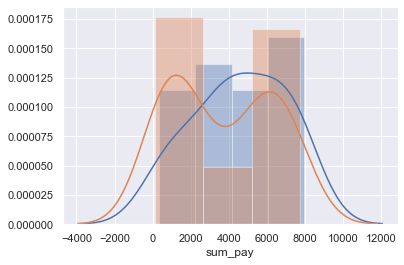

In [231]:
# По точке 1186 покупок в тестовой группе больше, приобладает в цене до 2х тр. Общая сумма покупок на 40тр больше в тестовой.
sns.distplot(df_control86['sum_pay']) #голубая
sns.distplot(df_test86['sum_pay'])
plt.show()

In [251]:
df_control86['sum_pay'].sum()

104558.0

In [234]:
df_control86.describe( )

,id_client,sum_pay,id_point,months_reg
count,2.300000e+01,23.000000,23.0,23.000000
mean,1.392917e+06,4546.000000,1186.0,6.391304
std,1.823789e+01,2416.200285,0.0,3.340375
min,1.392892e+06,326.000000,1186.0,0.000000
25%,1.392900e+06,3245.500000,1186.0,5.000000
50%,1.392915e+06,4481.000000,1186.0,6.000000
75%,1.392930e+06,6843.000000,1186.0,8.500000
max,1.392950e+06,7947.000000,1186.0,13.000000


In [252]:
df_test86['sum_pay'].sum()

145536.0

In [235]:
df_test86.describe( )

,id_client,sum_pay,id_point,months_reg
count,4.000000e+01,40.000000,40.0,40.000000
mean,1.392924e+06,3638.400000,1186.0,4.775000
std,1.870484e+01,2650.881922,0.0,3.423055
min,1.392890e+06,102.000000,1186.0,0.000000
25%,1.392909e+06,1252.750000,1186.0,2.000000
50%,1.392928e+06,3395.000000,1186.0,4.000000
75%,1.392939e+06,5945.250000,1186.0,7.000000
max,1.392953e+06,7751.000000,1186.0,12.000000


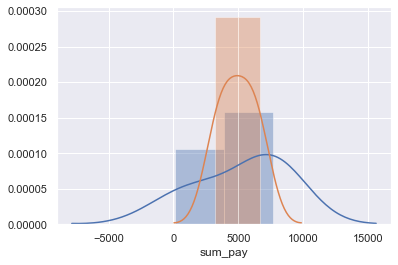

In [232]:
# По точке 1188 контрольная группа показывает себя лучше, общая сумма покупок больше.
sns.distplot(df_control88['sum_pay']) #голубая
sns.distplot(df_test88['sum_pay'])
plt.show()

In [253]:
df_control88['sum_pay'].sum()

26010.0

In [255]:
df_control88.describe( )

,id_client,sum_pay,id_point,months_reg
count,5.000000e+00,5.00000,5.0,5.000000
mean,1.392960e+06,5202.00000,1188.0,6.400000
std,4.024922e+00,3481.66835,0.0,4.219005
min,1.392954e+06,112.00000,1188.0,1.000000
25%,1.392958e+06,3000.00000,1188.0,5.000000
50%,1.392960e+06,7567.00000,1188.0,5.000000
75%,1.392963e+06,7654.00000,1188.0,9.000000
max,1.392964e+06,7677.00000,1188.0,12.000000


In [254]:
df_test88['sum_pay'].sum()

19784.0

In [256]:
df_test88.describe( )

,id_client,sum_pay,id_point,months_reg
count,4.000000e+00,4.00000,4.0,4.000000
mean,1.392958e+06,4946.00000,1188.0,6.500000
std,2.753785e+00,1490.00604,0.0,1.290994
min,1.392955e+06,3233.00000,1188.0,5.000000
25%,1.392956e+06,4050.50000,1188.0,5.750000
50%,1.392958e+06,4942.50000,1188.0,6.500000
75%,1.392960e+06,5838.00000,1188.0,7.250000
max,1.392961e+06,6666.00000,1188.0,8.000000


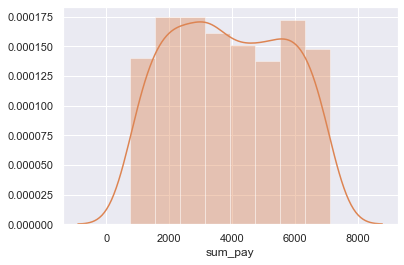

In [233]:
# По точке 1199 контрольная группа не совершила ни одной покупки, когда тестовая показала 476 покупок на общую сумму 1 860 618 р.
sns.distplot(df_control99['sum_pay']) #голубая
sns.distplot(df_test99['sum_pay'])
plt.show()

In [257]:
df_control99['sum_pay'].sum()

0.0

In [258]:
df_test99['sum_pay'].sum()

1860618.0

In [259]:
df_test99.describe( )

,id_client,sum_pay,id_point,months_reg
count,4.760000e+02,476.000000,476.0,476.000000
mean,1.420108e+06,3908.861345,1199.0,5.021008
std,1.375536e+02,1804.832028,0.0,2.732953
min,1.419870e+06,763.000000,1199.0,0.000000
25%,1.419989e+06,2343.000000,1199.0,3.000000
50%,1.420108e+06,3823.000000,1199.0,5.000000
75%,1.420226e+06,5547.750000,1199.0,6.250000
max,1.420345e+06,7118.000000,1199.0,14.000000


In [ ]:
# Количество наблюдений достаточно, покупатей в каждой точки почти одинаковое, за исключением точки 1199, там тестовая группа 
# показала себя c отличной стороны.

In [227]:
def proxi_ranges(r1, r2, alpha):
        disp1=np.var(r1)
        disp2=np.var(r2)
        
        sp,pp=stats.pearsonr(r1, r2)
        ssp,ps=stats.spearmanr(r1, r2)
        
        if sp==0:
            print('Корреляция Пирсона равна нулю')
        elif abs(sp)<0.3:
            print('Kорреляция Пирсона является слабой')
        elif abs(sp)>=0.3 and abs(sp)<=0.7:
            print('Kорреляция Пирсона является средней')
        elif abs(sp)>0.7:
            print('Kорреляция Пирсона является сильной')
            
        if ssp==0:
            print('Корреляция Спирмена равна нулю')
        elif abs(ssp)<0.3:
            print('Kорреляция Спирмена является слабой')
        elif abs(ssp)>=0.3 and abs(ssp)<=0.7:
            print('Kорреляция Спирмена является средней')
        elif abs(ssp)>0.7:
            print('Kорреляция Спирмена является сильной')
        
        print('Дисперсия PHYSICS =',disp1)
        print('Дисперсия BLOOD =',disp2)
        
        print('PvP =',pp)
        print('PvS =',ps)
        
    
proxi_ranges(df2['sum_pay'],df2['months_reg'],alpha)

Kорреляция Пирсона является средней
Kорреляция Спирмена является средней
Дисперсия PHYSICS = 6023336.11113493
Дисперсия BLOOD = 10.038649533445552
PvP = 0.0
PvS = 0.0


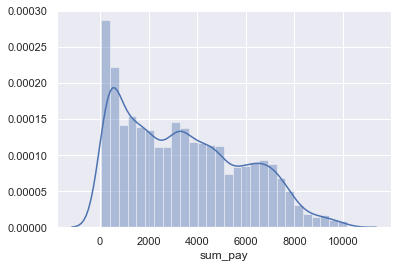

In [228]:
sns.distplot(df2['sum_pay'])

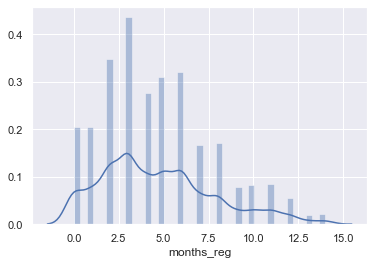

In [229]:
sns.distplot(df2['months_reg'])

In [261]:
metrics = df2.groupby('id_group', as_index= False).agg({'id_client': 'count','sum_pay':'mean', 'sum_pay': 'sum','months_reg':'mean'})
metrics

,id_group,id_client,sum_pay,months_reg
0,control,5140,17165212.0,4.651167
1,test,5621,19759846.0,4.714997


In [ ]:
# Корреляция средняя. Считаю, что гипотеза Но неверная, если мы выбирем повышение выплаты боллов лояльности это значительно 
# повлияет на спрос. В тестовой группе клиентов стало больше и сумма покупок больше. При этом клиенты с нами в среднем 4,5 месяца.